In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#from pylab import rcParams

%matplotlib inline
#sns.set_style("ticks")
#rcParams['figure.figsize'] = 12, 6

##### Подгрузим данные из файла

In [2]:
classes_df = pd.read_csv("classes_train.csv")
features_df = pd.read_csv("features_train.csv")

##### Посмотрим на содержимое classes_df

In [3]:
classes_df.sample(5)

,is_bot
348,0
1117,0
722,0
1850,1
278,0


In [4]:
classes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   is_bot  2400 non-null   int64
dtypes: int64(1)
memory usage: 18.9 KB


##### Посмотрим на содержимое features_df

In [5]:
features_df.sample(5)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
1765,2585,13583,4171,2815,417,1,1,1,1764,1.465420,7.700113,2.364512,1.595805,0.236395,3.256533,14,0,15,0,131
1891,3357,14,1,0,0,0,0,0,1096,3.062956,0.012774,0.000912,0.000000,0.000000,14.000000,15,0,21,0,105
706,9713,6787,1137,2743,268,0,1,1,3508,2.768814,1.934721,0.324116,0.781927,0.076397,5.969217,12,0,13,0,154
362,57532,103532,1927,14443,3147,1,1,1,4612,12.474415,22.448395,0.417823,3.131613,0.682350,53.727037,11,0,12,0,122
612,17258,82540,435,11379,284,0,1,1,3173,5.439017,26.013237,0.137094,3.586196,0.089505,189.747126,14,0,14,0,144


In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   statuses_count                   2400 non-null   int64  
 1   followers_count                  2400 non-null   int64  
 2   friends_count                    2400 non-null   int64  
 3   favourites_count                 2400 non-null   int64  
 4   listed_count                     2400 non-null   int64  
 5   is_default_profile               2400 non-null   int64  
 6   is_profile_use_background_image  2400 non-null   int64  
 7   is_verified                      2400 non-null   int64  
 8   user_age                         2400 non-null   int64  
 9   tweets_freq                      2400 non-null   float64
 10  followers_growth_rate            2400 non-null   float64
 11  friends_growth_rate              2400 non-null   float64
 12  favourites_growth_ra

##### Объединим данные вместе (чтобы могли исследовать в совокупности)

In [7]:
df = features_df.copy()
df["is_bot"] = classes_df.is_bot

##### Посмотрим на статистику данных

In [8]:
df.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
count,2.400000e+03,2.400000e+03,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2.629046e+04,8.955198e+04,1963.246250,10648.327917,709.082083,0.243333,0.704167,0.743750,3382.837083,7.634789,...,0.497441,2.810923,0.169272,3.284046e+03,11.179583,0.118750,13.923750,0.059167,111.012917,0.250000
std,5.771702e+04,7.347846e+05,6095.658137,24481.941917,3343.528520,0.429184,0.456512,0.436652,1234.070943,20.714654,...,1.451790,6.764467,0.693192,3.140602e+04,2.634747,0.513736,4.789136,0.395682,43.193461,0.433103
min,8.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,726.000000,0.001752,...,0.000000,0.000000,0.000000,6.859206e-02,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.531000e+03,1.528250e+03,110.000000,90.000000,43.000000,0.000000,0.000000,0.000000,2220.250000,1.537573,...,0.033929,0.034419,0.014677,3.310664e+00,9.000000,0.000000,11.000000,0.000000,79.000000,0.000000
50%,1.141750e+04,6.512500e+03,881.500000,2728.500000,158.000000,0.000000,1.000000,1.000000,3834.500000,3.536165,...,0.224359,0.734363,0.043637,1.200000e+01,11.000000,0.000000,13.000000,0.000000,123.000000,0.000000
75%,2.758800e+04,2.634400e+04,1969.000000,10688.250000,480.000000,0.000000,1.000000,1.000000,4396.000000,7.838287,...,0.502255,2.659280,0.119837,8.490969e+01,13.000000,0.000000,16.000000,0.000000,149.000000,0.250000
max,1.768111e+06,1.848919e+07,128736.000000,462740.000000,112295.000000,1.000000,1.000000,1.000000,5388.000000,708.661723,...,27.378988,121.517857,21.906945,1.342549e+06,15.000000,8.000000,48.000000,8.000000,172.000000,1.000000


In [9]:
# Сколько полей с None
df.isnull().sum()

statuses_count                     0
followers_count                    0
friends_count                      0
favourites_count                   0
listed_count                       0
is_default_profile                 0
is_profile_use_background_image    0
is_verified                        0
user_age                           0
tweets_freq                        0
followers_growth_rate              0
friends_growth_rate                0
favourites_growth_rate             0
listed_growth_rate                 0
followers_friends_ratio            0
screen_name_length                 0
num_digits_in_screen_name          0
length_of_name                     0
num_digits_in_name                 0
description_length                 0
is_bot                             0
dtype: int64

##### Матрица корреляции:

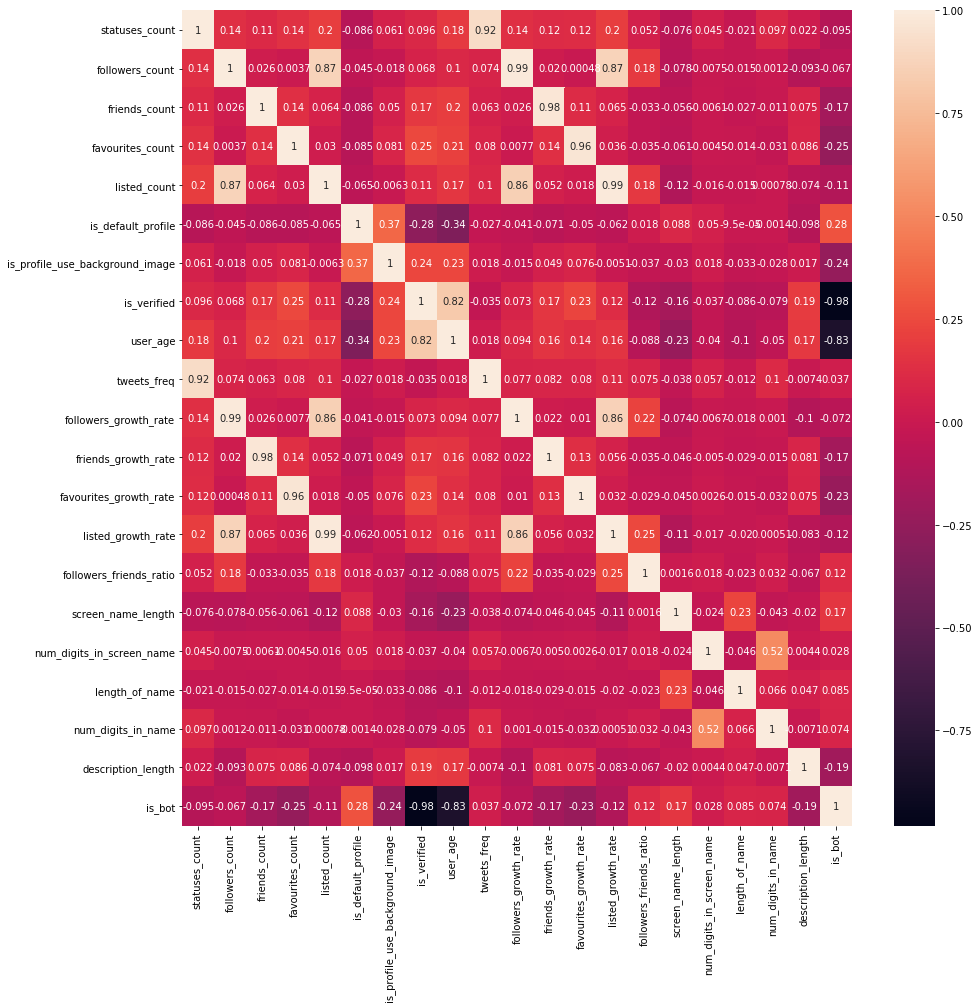

In [10]:
plt.figure(figsize=(15,15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

##### Посмотрим на статраспределение поля `screen_name_length`

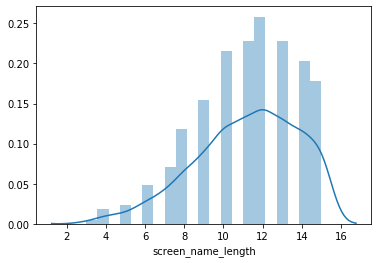

In [11]:
sns.distplot(df.screen_name_length)

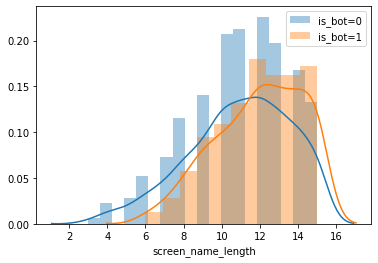

In [12]:
sns.distplot(df[df['is_bot']==0].screen_name_length, label='is_bot=0')
sns.distplot(df[df['is_bot']==1].screen_name_length, label='is_bot=1')
plt.legend()

# Задание 1.1: Обучить модель без каких-либо дополнительных условий, которая наилучшим обрахом должна отработать на тестовой выборке преподавателя с точки зрения F-меры

##### Разобъем на train и test выборки

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df.drop('is_bot',axis=1), df.is_bot, random_state = 32, test_size = 0.3)

##### Предобработаем данные

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import pickle
with open('./models/scaler_task_1.1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

##### Обучаем логрегрессию:

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,classification_report

In [17]:
from sklearn.linear_model import LogisticRegression

m1 = 'Logistic Regression'
lr = LogisticRegression()
%time model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
lr_f1_score = f1_score(y_test, lr_predict, average="weighted")
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("F1 of Logistic Regression:",lr_f1_score,'\n')
print(classification_report(y_test,lr_predict))

Wall time: 17 ms
confussion matrix
[[549   4]
 [  0 167]]


F1 of Logistic Regression: 0.9944672348762812 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       553
           1       0.98      1.00      0.99       167

    accuracy                           0.99       720
   macro avg       0.99      1.00      0.99       720
weighted avg       0.99      0.99      0.99       720



In [18]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Выгружаем модель в файл

In [19]:
import pickle
with open('./models/model_task_1.1.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [20]:
f

<_io.BufferedWriter name='./models/model_task_1.1.pkl'>

# Задание 2.1: Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества

##### Вытаскиваем 10 признаков, которые больше всего коррелируют с полем is_bot

In [21]:
most_corr_fields_series=abs(corrMatrix.is_bot).sort_values(ascending=False).drop("is_bot")[0:11]
most_corr_fields_series

is_verified                        0.981401
user_age                           0.830394
is_default_profile                 0.282557
favourites_count                   0.245066
is_profile_use_background_image    0.243506
favourites_growth_rate             0.228894
description_length                 0.188882
friends_count                      0.174877
friends_growth_rate                0.171827
screen_name_length                 0.165203
listed_growth_rate                 0.118131
Name: is_bot, dtype: float64

##### Увидели, что поле `user_age` сильно скоррелировано с искомым полем 'is_bot'. Посмотрим на статраспределение поля `user_age`

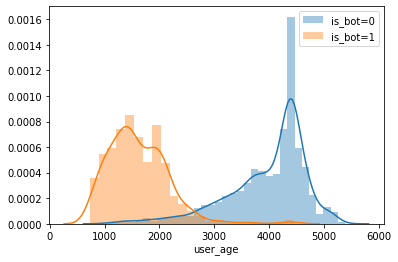

In [22]:
sns.distplot(df[df['is_bot']==0].user_age , label='is_bot=0')
sns.distplot(df[df['is_bot']==1].user_age , label='is_bot=1')
plt.legend()

##### Оставим в датасете только 10 самых наиболее коррелирующих с полем is_bot столбцов

In [23]:
# Преобразуем pandas.series в list
most_corr_fields_list = list(most_corr_fields_series.index)
most_corr_fields_list.append('is_bot') # Не забываем оставить поле, на котором мы будем обучаться
most_corr_fields_list

['is_verified',
 'user_age',
 'is_default_profile',
 'favourites_count',
 'is_profile_use_background_image',
 'favourites_growth_rate',
 'description_length',
 'friends_count',
 'friends_growth_rate',
 'screen_name_length',
 'listed_growth_rate',
 'is_bot']

In [24]:
df_10 = df[most_corr_fields_list].copy()

##### Разобъем на train и test выборки

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df_10.drop('is_bot',axis=1), df_10.is_bot, random_state = 32, test_size = 0.3)

##### Предобработаем данные

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
import pickle
with open('./models/scaler_task_2.1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

##### Обучим модели

In [28]:
from sklearn.linear_model import LogisticRegression

m1 = 'Logistic Regression'
lr = LogisticRegression()
%time model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_f1_score = f1_score(y_test, lr_predict, average="weighted")
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("F1 of Logistic Regression:",lr_f1_score,'\n')
print(classification_report(y_test,lr_predict))

Wall time: 31 ms
confussion matrix
[[549   4]
 [  0 167]]


F1 of Logistic Regression: 0.9944672348762812 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       553
           1       0.98      1.00      0.99       167

    accuracy                           0.99       720
   macro avg       0.99      1.00      0.99       720
weighted avg       0.99      0.99      0.99       720



In [29]:
from sklearn.naive_bayes import GaussianNB

m2 = 'Naive Bayes'
nb = GaussianNB()
%time nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_f1_score = f1_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("F1 of Naive Bayes model:",nb_f1_score,'\n')
print(classification_report(y_test,nbpred))

Wall time: 5 ms
confussion matrix
[[549   4]
 [  2 165]]


F1 of Naive Bayes model: 0.9821428571428571 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       553
           1       0.98      0.99      0.98       167

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



In [30]:
from sklearn.ensemble import RandomForestClassifier

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
%time rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_f1_score = f1_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("F1 of Random Forest:",rf_f1_score,'\n')
print(classification_report(y_test,rf_predicted))

Wall time: 58 ms
confussion matrix
[[550   3]
 [  1 166]]


F1 of Random Forest: 0.988095238095238 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       553
           1       0.98      0.99      0.99       167

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



In [31]:
from sklearn.model_selection import GridSearchCV

# решил подобрать параметры получше
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, bootstrap = True,) 

param_grid = { 
    'n_estimators': [20, 40, 70, 100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state' : [0,32,48],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [32]:
%time CV_rfc.fit(X_train,y_train)

Wall time: 1min 24s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                    

In [33]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
CV_rfc_preds = CV_rfc.predict(X_test)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
rf_f1_score = f1_score(y_test, CV_rfc_preds)
print("F1 of Random Forest:",rf_f1_score,'\n')
print(classification_report(y_test,CV_rfc_preds))

confussion matrix
[[550   3]
 [  1 166]]


F1 of Random Forest: 0.988095238095238 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       553
           1       0.98      0.99      0.99       167

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



In [35]:
from catboost import CatBoostClassifier

m8 = 'CatBoost'
cbc =  CatBoostClassifier()
%time cbc.fit(X_train, y_train)
cbc_predicted = cbc.predict(X_test)
cbc_conf_matrix = confusion_matrix(y_test, cbc_predicted)
cbc_f1_score = f1_score(y_test, cbc_predicted)
print("confussion matrix")
print(cbc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",cbc_f1_score,'\n')
print(classification_report(y_test,cbc_predicted))

Learning rate set to 0.012857
0:	learn: 0.6581674	total: 60.7ms	remaining: 1m
1:	learn: 0.6238825	total: 67.8ms	remaining: 33.9s
2:	learn: 0.5935840	total: 73.6ms	remaining: 24.4s
3:	learn: 0.5625532	total: 79.1ms	remaining: 19.7s
4:	learn: 0.5361745	total: 84.3ms	remaining: 16.8s
5:	learn: 0.5085539	total: 88.7ms	remaining: 14.7s
6:	learn: 0.4836844	total: 93.3ms	remaining: 13.2s
7:	learn: 0.4605590	total: 98ms	remaining: 12.2s
8:	learn: 0.4356009	total: 102ms	remaining: 11.3s
9:	learn: 0.4131130	total: 106ms	remaining: 10.5s
10:	learn: 0.3921292	total: 111ms	remaining: 9.95s
11:	learn: 0.3730278	total: 114ms	remaining: 9.35s
12:	learn: 0.3532461	total: 115ms	remaining: 8.76s
13:	learn: 0.3384220	total: 120ms	remaining: 8.48s
14:	learn: 0.3212128	total: 125ms	remaining: 8.19s
15:	learn: 0.3038170	total: 129ms	remaining: 7.96s
16:	learn: 0.2884519	total: 134ms	remaining: 7.77s
17:	learn: 0.2746322	total: 139ms	remaining: 7.57s
18:	learn: 0.2603206	total: 143ms	remaining: 7.38s
19:	lear

180:	learn: 0.0055278	total: 869ms	remaining: 3.93s
181:	learn: 0.0054739	total: 873ms	remaining: 3.92s
182:	learn: 0.0054286	total: 877ms	remaining: 3.92s
183:	learn: 0.0054118	total: 882ms	remaining: 3.91s
184:	learn: 0.0053675	total: 888ms	remaining: 3.91s
185:	learn: 0.0053292	total: 895ms	remaining: 3.92s
186:	learn: 0.0052781	total: 900ms	remaining: 3.91s
187:	learn: 0.0052239	total: 905ms	remaining: 3.91s
188:	learn: 0.0052019	total: 911ms	remaining: 3.91s
189:	learn: 0.0051524	total: 915ms	remaining: 3.9s
190:	learn: 0.0051218	total: 919ms	remaining: 3.89s
191:	learn: 0.0050786	total: 924ms	remaining: 3.89s
192:	learn: 0.0050552	total: 929ms	remaining: 3.88s
193:	learn: 0.0050043	total: 933ms	remaining: 3.88s
194:	learn: 0.0049660	total: 937ms	remaining: 3.87s
195:	learn: 0.0049502	total: 941ms	remaining: 3.86s
196:	learn: 0.0049085	total: 945ms	remaining: 3.85s
197:	learn: 0.0048698	total: 949ms	remaining: 3.85s
198:	learn: 0.0048345	total: 953ms	remaining: 3.84s
199:	learn: 0

342:	learn: 0.0021690	total: 1.55s	remaining: 2.98s
343:	learn: 0.0021656	total: 1.56s	remaining: 2.97s
344:	learn: 0.0021564	total: 1.56s	remaining: 2.97s
345:	learn: 0.0021495	total: 1.57s	remaining: 2.97s
346:	learn: 0.0021370	total: 1.57s	remaining: 2.96s
347:	learn: 0.0021325	total: 1.58s	remaining: 2.96s
348:	learn: 0.0021206	total: 1.58s	remaining: 2.95s
349:	learn: 0.0021160	total: 1.58s	remaining: 2.94s
350:	learn: 0.0021128	total: 1.59s	remaining: 2.94s
351:	learn: 0.0021063	total: 1.59s	remaining: 2.93s
352:	learn: 0.0020971	total: 1.6s	remaining: 2.93s
353:	learn: 0.0020840	total: 1.6s	remaining: 2.92s
354:	learn: 0.0020761	total: 1.6s	remaining: 2.92s
355:	learn: 0.0020671	total: 1.61s	remaining: 2.91s
356:	learn: 0.0020627	total: 1.61s	remaining: 2.91s
357:	learn: 0.0020563	total: 1.62s	remaining: 2.9s
358:	learn: 0.0020488	total: 1.62s	remaining: 2.9s
359:	learn: 0.0020443	total: 1.63s	remaining: 2.89s
360:	learn: 0.0020367	total: 1.63s	remaining: 2.89s
361:	learn: 0.002

506:	learn: 0.0012788	total: 2.24s	remaining: 2.18s
507:	learn: 0.0012748	total: 2.25s	remaining: 2.18s
508:	learn: 0.0012715	total: 2.25s	remaining: 2.17s
509:	learn: 0.0012667	total: 2.26s	remaining: 2.17s
510:	learn: 0.0012667	total: 2.26s	remaining: 2.16s
511:	learn: 0.0012636	total: 2.26s	remaining: 2.16s
512:	learn: 0.0012587	total: 2.27s	remaining: 2.15s
513:	learn: 0.0012571	total: 2.27s	remaining: 2.15s
514:	learn: 0.0012535	total: 2.28s	remaining: 2.15s
515:	learn: 0.0012504	total: 2.28s	remaining: 2.14s
516:	learn: 0.0012463	total: 2.29s	remaining: 2.14s
517:	learn: 0.0012433	total: 2.29s	remaining: 2.13s
518:	learn: 0.0012401	total: 2.29s	remaining: 2.13s
519:	learn: 0.0012373	total: 2.3s	remaining: 2.12s
520:	learn: 0.0012337	total: 2.31s	remaining: 2.12s
521:	learn: 0.0012297	total: 2.31s	remaining: 2.11s
522:	learn: 0.0012263	total: 2.31s	remaining: 2.11s
523:	learn: 0.0012232	total: 2.32s	remaining: 2.1s
524:	learn: 0.0012213	total: 2.32s	remaining: 2.1s
525:	learn: 0.0

667:	learn: 0.0008762	total: 2.93s	remaining: 1.46s
668:	learn: 0.0008759	total: 2.94s	remaining: 1.45s
669:	learn: 0.0008751	total: 2.94s	remaining: 1.45s
670:	learn: 0.0008734	total: 2.95s	remaining: 1.44s
671:	learn: 0.0008708	total: 2.95s	remaining: 1.44s
672:	learn: 0.0008692	total: 2.96s	remaining: 1.44s
673:	learn: 0.0008673	total: 2.96s	remaining: 1.43s
674:	learn: 0.0008650	total: 2.96s	remaining: 1.43s
675:	learn: 0.0008640	total: 2.97s	remaining: 1.42s
676:	learn: 0.0008614	total: 2.97s	remaining: 1.42s
677:	learn: 0.0008594	total: 2.98s	remaining: 1.41s
678:	learn: 0.0008571	total: 2.98s	remaining: 1.41s
679:	learn: 0.0008555	total: 2.99s	remaining: 1.41s
680:	learn: 0.0008541	total: 2.99s	remaining: 1.4s
681:	learn: 0.0008521	total: 3s	remaining: 1.4s
682:	learn: 0.0008498	total: 3s	remaining: 1.39s
683:	learn: 0.0008481	total: 3.01s	remaining: 1.39s
684:	learn: 0.0008465	total: 3.01s	remaining: 1.38s
685:	learn: 0.0008450	total: 3.01s	remaining: 1.38s
686:	learn: 0.000845

839:	learn: 0.0007032	total: 3.79s	remaining: 723ms
840:	learn: 0.0007032	total: 3.8s	remaining: 718ms
841:	learn: 0.0007032	total: 3.8s	remaining: 713ms
842:	learn: 0.0007022	total: 3.81s	remaining: 709ms
843:	learn: 0.0007009	total: 3.81s	remaining: 705ms
844:	learn: 0.0007000	total: 3.82s	remaining: 701ms
845:	learn: 0.0007000	total: 3.82s	remaining: 696ms
846:	learn: 0.0006987	total: 3.83s	remaining: 691ms
847:	learn: 0.0006982	total: 3.83s	remaining: 687ms
848:	learn: 0.0006982	total: 3.83s	remaining: 682ms
849:	learn: 0.0006982	total: 3.84s	remaining: 677ms
850:	learn: 0.0006982	total: 3.84s	remaining: 673ms
851:	learn: 0.0006973	total: 3.85s	remaining: 668ms
852:	learn: 0.0006959	total: 3.85s	remaining: 664ms
853:	learn: 0.0006959	total: 3.85s	remaining: 659ms
854:	learn: 0.0006959	total: 3.86s	remaining: 655ms
855:	learn: 0.0006959	total: 3.87s	remaining: 650ms
856:	learn: 0.0006959	total: 3.87s	remaining: 646ms
857:	learn: 0.0006959	total: 3.87s	remaining: 641ms
858:	learn: 0.

Wall time: 5.15 s
confussion matrix
[[550   3]
 [  0 167]]


Accuracy of Support Vector Classifier: 0.9910979228486646 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       553
           1       0.98      1.00      0.99       167

    accuracy                           1.00       720
   macro avg       0.99      1.00      0.99       720
weighted avg       1.00      1.00      1.00       720



In [36]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','CatBoost'], 'F1 score': [lr_f1_score,
                    nb_f1_score,rf_f1_score, cbc_f1_score]})
model_ev.sort_values('F1 score' , ascending=False)

,Model,F1 score
0,Logistic Regression,0.994467
3,CatBoost,0.991098
2,Random Forest,0.988095
1,Naive Bayes,0.982143


##### Десерализуем модель в файл

In [37]:
import pickle
with open('./models/model_task_2.1.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Задание 2.2: Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения

### 2.2 Вывод по лучшей модельке:
Наилучшие результаты показала логистическая регрессия.

Был достигнут F1 score в 0.9944 на валидационной выборке.


In [38]:
print("confussion matrix")
print(lr_conf_matrix)
(tn, fp, fn, tp) = lr_conf_matrix.ravel()
(tn, fp, fn, tp)

confussion matrix
[[549   4]
 [  0 167]]


(549, 4, 0, 167)

Было дано 4 ложноположительных оценок и 0 ложноотрицательных на выборке из 720 аккаунтов.С учетом специфики датасета, лучше выдать ложноположительный результат при предсказании бота, что и делает представленная модель на данной валиационной выборке